In [1]:
import skyflux as sf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%run show_wedge

In [4]:
# Calculate our Q matrix for the parameters
    # bandwidth runs from 125 to 175 MHz in 1 MHz increments
# 'angular resolution' is not constrained by the details
    # of the observation but rather by the user's patience
Q = calculate_Q(
    B = np.arange(125e6, 175e6 + 0.001, 1e6),
    angular_resolution=250,
    quiet=True
)

Establishing integration parameters


In [5]:
Qi = np.linalg.inv(Q)
# Ridhima suggests that off-diagonal terms are harmful
Qid = diag(Qi)

Minimum: 3.1308641090899476
PTP: 11.952819845997578


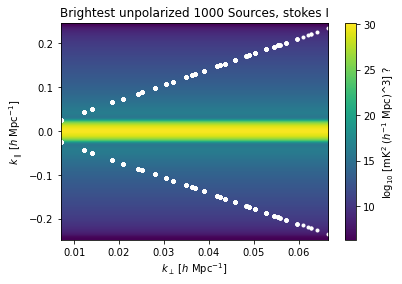

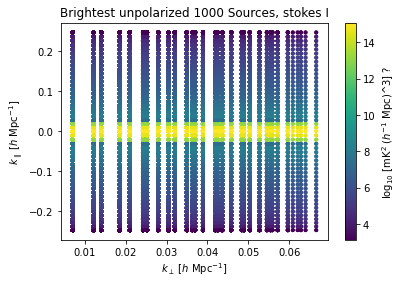

Minimum: 2.469036150076344
PTP: 11.95230511896048


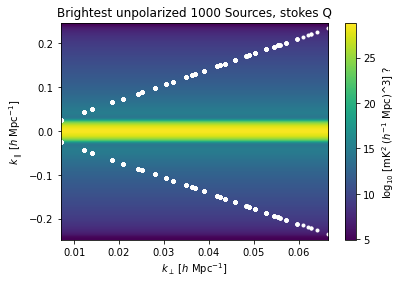

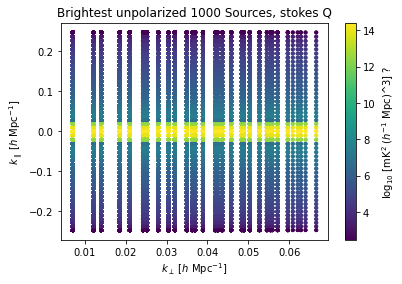

Minimum: 0.8143870830140159
PTP: 11.952543615428347


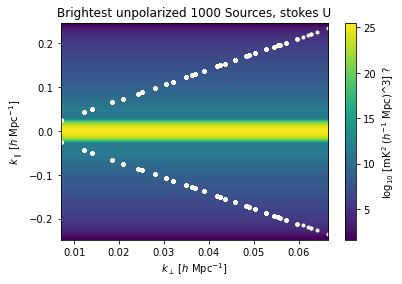

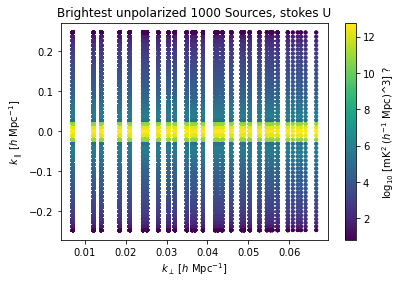

Minimum: 0.6328958559355091
PTP: 11.952529206642746


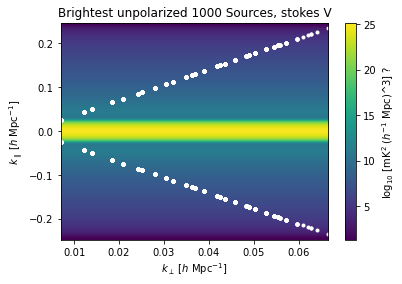

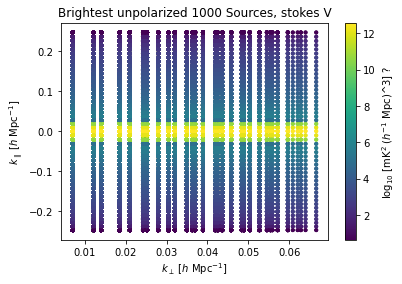

In [9]:
# First, let's look at the unpolarized results
uptub = "Brightest 1000 sources, polarized, Stokes "
    # unpolarized plot title override, base
u_x, u_y, u_I, u_image = wauto_show(
    "HIJKL", sp=0, pt_override=uptub+"I",
    Qi=Qid, quiet=True)
u_x, u_y, u_Q, u_image = wauto_show(
    "HIJKL", sp=1, pt_override=uptub+"Q",
    Qi=Qid, quiet=True)
u_x, u_y, u_U, u_image = wauto_show(
    "HIJKL", sp=2, pt_override=uptub+"U",
    Qi=Qid, quiet=True)
u_x, u_y, u_V, u_image = wauto_show(
    "HIJKL", sp=3, pt_override=uptub+"V",
    Qi=Qid, quiet=True)

In [17]:
# 'visual' is an array of 3D tuples:
    # k_perpendicular, k_parallel, and power
uk = []
urat_I = []

for i in range(len(u_I)):
    I = u_I[i]
    Q = u_Q[i]
    U = u_U[i]
    V = u_V[i]
    
    k_perp = I[0]
    k_par = I[1]
    uk.append(np.sqrt(k_perp ** 2 + k_par ** 2))

    prop_I = 10 ** I[2]
    prop_Q = 10 ** Q[2]
    prop_U = 10 ** U[2]
    prop_V = 10 ** V[2]
    rats = np.array([prop_Q, prop_U, prop_V])
    urat_I.append(rats / prop_I)

uk = np.array(uk)
urat_I = np.array(urat_I)

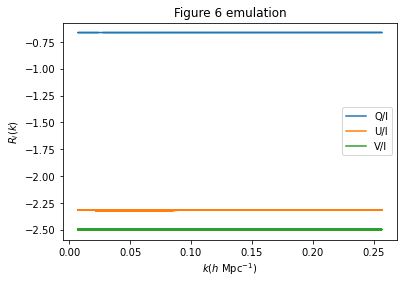

In [25]:
# Now we have prepared the k data and we just want
# to represent them

plt.xlabel(r"$k (h$ Mpc$^{-1})$")
plt.ylabel(r"$R_i (k)$")
plt.title("Figure 6 emulation")

plt.plot(uk, np.log10(urat_I[:, 0]), label="Q/I")
plt.plot(uk, np.log10(urat_I[:, 1]), label="U/I")
plt.plot(uk, np.log10(urat_I[:, 2]), label="V/I")

plt.legend()
plt.show()

#!! Not enough variation: what went wrong?

Minimum: 4.449170229166883
PTP: 3.314652345535241


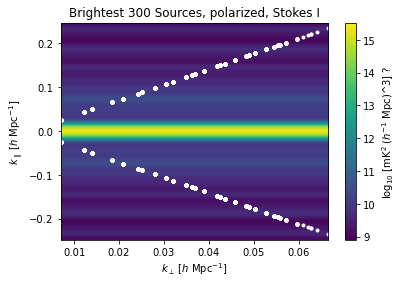

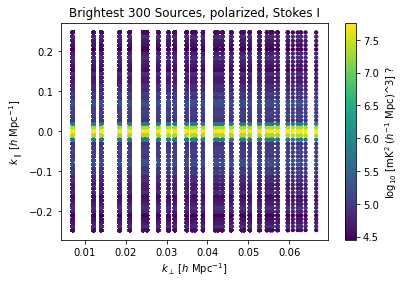

Minimum: 4.829965487971777
PTP: 3.47636402747201


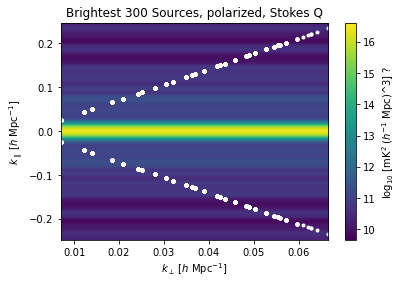

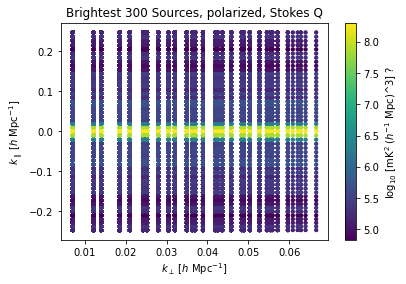

Minimum: 4.527525701356187
PTP: 3.617802360207368


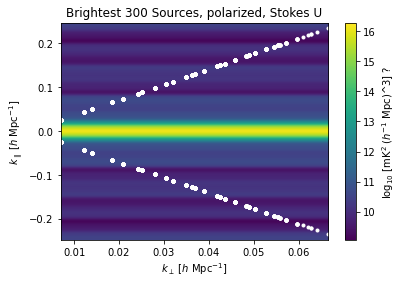

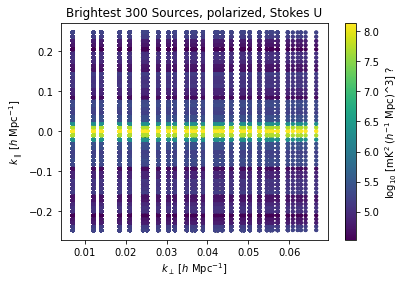

Minimum: 3.9675112695444033
PTP: 3.4748096718444983


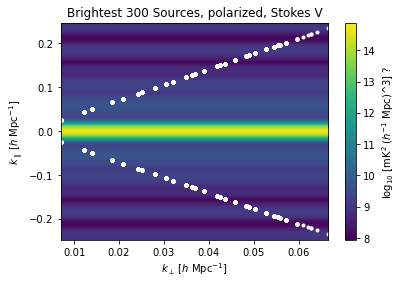

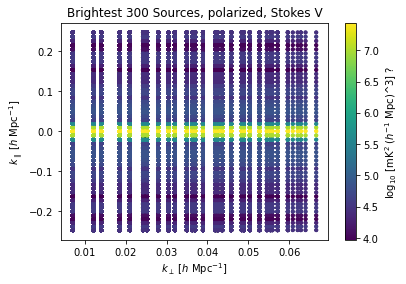

In [30]:
# Next, let's look at the polarized results
pptub = "Brightest 300 Sources, polarized, Stokes "
    # polarized plot title override, base
p_x, p_y, p_I, p_image = wauto_show(
    "pDryRun", sp=0, pt_override=pptub+"I",
    Qi=Qid, quiet=True)
p_x, p_y, p_Q, p_image = wauto_show(
    "pDryRun", sp=1, pt_override=pptub+"Q",
    Qi=Qid, quiet=True)
p_x, p_y, p_U, p_image = wauto_show(
    "pDryRun", sp=2, pt_override=pptub+"U",
    Qi=Qid, quiet=True)
p_x, p_y, p_V, p_image = wauto_show(
    "pDryRun", sp=3, pt_override=pptub+"V",
    Qi=Qid, quiet=True)

In [38]:
def visual_to_deltas(vI, vQ, vU, vV):
    # 'visual' is an array of 3D tuples:
        # k_perpendicular, k_parallel, and power
    pk = []
    pdeltas = []

    for i in range(len(u_I)):
        I = vI[i]
        Q = vQ[i]
        U = vU[i]
        V = vV[i]

        k_perp = I[0]
        k_par = I[1]
        k = np.sqrt(k_perp ** 2 + k_par ** 2)
        pk.append(k)

        prop_I = 10 ** I[2]
        prop_Q = 10 ** Q[2]
        prop_U = 10 ** U[2]
        prop_V = 10 ** V[2]
        deltas = np.array([
            prop_I, prop_Q, prop_U, prop_V
        ])
        pdeltas.append(deltas * k ** 3 / 2 / np.pi ** 2)

    return np.array(pk), np.array(pdeltas)

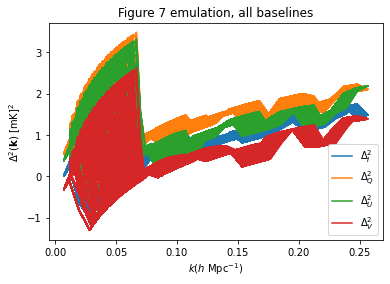

In [41]:
# Now we have prepared the k data and we want
# to represent them
pk, pdeltas = visual_to_deltas(p_I, p_Q, p_U, p_V)

plt.xlabel(r"$k (h$ Mpc$^{-1})$")
plt.ylabel(r"$\Delta^2(\mathbf{k})$ [mK]$^2$")
plt.title("Figure 7 emulation, all baselines")

plt.plot(pk, np.log10(pdeltas[:, 0]),
         label=r"$\Delta^2_I$")
plt.plot(pk, np.log10(pdeltas[:, 1]),
         label=r"$\Delta^2_Q$")
plt.plot(pk, np.log10(pdeltas[:, 2]),
         label=r"$\Delta^2_U$")
plt.plot(pk, np.log10(pdeltas[:, 3]),
         label=r"$\Delta^2_V$")

plt.legend()
plt.show()

# Q: What went wrong? 
# A: we were supposed to just use one baseline,
    # not all of them at once
# Furthermore, our simulation parameters do not line up:
    # figure 7 uses an 8 MHz bandwidth,
    # we use a 50 MHz bandwidth

In [32]:
sf.demo.find_baseline(30)

Best squared error: 0.6079320796230988


(37, 68)

In [34]:
sf.ant.baselength(37, 68)

29.22030000665442

In [35]:
# Let's try to get a better image by looking at
    # a thirty meter baseline
tpx, tpy, tpp, tpimage = wauto_show(
    "pDryRun", Qi=Qid, quiet=True,
    special_request=(37, 68))

Exiting
Exiting
Exiting
Exiting


In [40]:
# Now we have prepared the k data and we want
# to represent them
pk, pdeltas = visual_to_deltas(tpI, tpQ, tpU, tpV)

plt.xlabel(r"$k (h$ Mpc$^{-1})$")
plt.ylabel(r"$\Delta^2(\mathbf{k})$ [mK]$^2$")
plt.title("Figure 7 emulation, 30m baseline")

plt.plot(pk, np.log10(pdeltas[:, 0]),
         label=r"$\Delta^2_I$")
plt.plot(pk, np.log10(pdeltas[:, 1]),
         label=r"$\Delta^2_Q$")
plt.plot(pk, np.log10(pdeltas[:, 2]),
         label=r"$\Delta^2_U$")
plt.plot(pk, np.log10(pdeltas[:, 3]),
         label=r"$\Delta^2_V$")

plt.legend()
plt.show()

# Q: What went wrong? 
# A: we were supposed to just use one baseline,
    # not all of them at once
# Furthermore, our simulation parameters do not line up:
    # figure 7 uses an 8 MHz bandwidth,
    # we use a 50 MHz bandwidth

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
"""
Todo (in addition to many other things):
* Shades grey region on figure 7 not yet emulated
* We want to try narrower baselines when emulating fig 6
* We want dotted lines just like figure 6 has
* We want logarithmic ticks on the y axis
"""